<a href="https://colab.research.google.com/github/gamer-217/ML/blob/main/13%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B3%BC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%A3%BC%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

13.2 Keras를 사용한 신경망 구축과 아이리스 데이터셋 분류


In [ ]:
# 필요한 라이브러리를 임포트합니다.
from tensorflow import keras
from keras.layers import Dense
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# 아이리스 데이터셋을 로드합니다.
iris = datasets.load_iris()
data = iris.data  # 입력 데이터 (특성들)
targ = iris.target  # 타겟 데이터 (클래스 레이블)

In [ ]:
# OneHotEncoder를 사용하여 타겟 데이터를 원-핫 인코딩합니다.
encoder = OneHotEncoder()
target = encoder.fit_transform(targ.reshape(-1, 1)).toarray()



[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [ ]:
# 인코딩된 타겟 데이터를 출력합니다.
print(target)

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 나눕니다 (훈련 세트: 80%, 테스트 세트: 20%).
X_train, X_test, Y_train, Y_test = train_test_split(data, target, train_size=0.8)


((120, 4), (30, 4), (120, 3), (30, 3))

In [ ]:
# 데이터의 형태를 출력하여 훈련 및 테스트 세트의 크기를 확인합니다.
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


In [ ]:
# Sequential 모델을 생성합니다.
model = keras.models.Sequential()
# 첫 번째 은닉층을 추가합니다 (뉴런 10개, 활성화 함수: sigmoid, 입력 형태: (4,)).
model.add(Dense(10, activation='sigmoid', input_shape=(4,)))

# 두 번째 은닉층을 추가합니다 (뉴런 10개, 활성화 함수: relu).
model.add(Dense(10, activation='relu'))

# 출력층을 추가합니다 (뉴런 3개, 활성화 함수: softmax).
model.add(Dense(3, activation='softmax'))
# 모델을 컴파일합니다 (손실 함수: categorical_crossentropy, 평가지표: accuracy).
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# 모델의 요약을 출력합니다.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델을 훈련시킵니다 (에포크 수: 100).
model.fit(X_train, Y_train, epochs=100)

# 테스트 세트를 사용하여 모델을 평가합니다.
score = model.evaluate(X_test, Y_test, verbose=1)

# 정확도와 손실을 출력합니다.
print('Correct:', score[1], 'loss:', score[0])

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 1.2290 - accuracy: 0.3500
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1855 - accuracy: 0.3500
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1607 - accuracy: 0.3500
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1434 - accuracy: 0.3500
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1283 - accuracy: 0.3500
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1169 - accuracy: 0.3500
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1082 - accuracy: 0.3500
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1015 - accuracy: 0.3500
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0944 - accuracy: 0.3500
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0880 - accuracy: 0.3500
Epoch 11/100
4/4 [===========

13.2.2 필기숫자 데이터 **분류하기**

In [ ]:
# 필요한 라이브러리를 임포트합니다.
from tensorflow import keras
from keras.layers import Dense
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# 필기숫자 데이터셋을 로드합니다.
digits = datasets.load_digits()

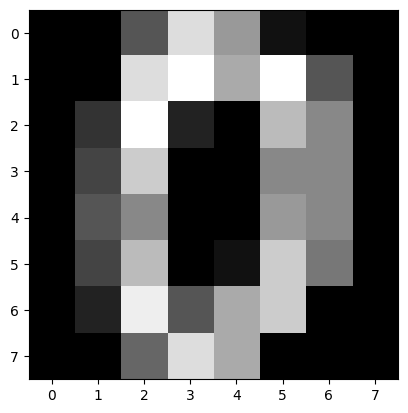

In [ ]:
# 데이터셋을 입력 데이터와 타겟 데이터로 나눕니다.
data = digits.data  # 입력 데이터 (각 숫자 이미지의 픽셀 값들)
targ = digits.target  # 타겟 데이터 (숫자 레이블)

# OneHotEncoder를 사용하여 타겟 데이터를 원-핫 인코딩합니다.
encoder = OneHotEncoder()
target = encoder.fit_transform(targ.reshape(-1, 1)).toarray()

# 첫 번째 숫자 이미지를 회색조로 시각화합니다.
plt.imshow(digits.images[0], cmap=plt.cm.gray)
plt.show()



In [ ]:
# 첫 번째 타겟 데이터의 원-핫 인코딩 결과를 출력합니다.
print(target[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 나눕니다 (훈련 세트: 80%, 테스트 세트: 20%).
trn_data, test_data, trn_target, test_target = train_test_split(data, target, train_size=0.8)


In [ ]:
# Sequential 모델을 생성합니다.
model = keras.models.Sequential()

# 첫 번째 은닉층을 추가합니다 (뉴런 32개, 입력 형태: (64,)).
model.add(Dense(32, input_shape=(64, ), activation='relu'))

# 두 번째 은닉층을 추가합니다 (뉴런 32개, 활성화 함수: relu).
model.add(Dense(32, activation='relu'))

# 출력층을 추가합니다 (뉴런 10개, 활성화 함수: softmax).
model.add(Dense(10, activation='softmax'))

# 모델을 컴파일합니다 (손실 함수: categorical_crossentropy, 평가지표: accuracy).
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
# 모델을 훈련시킵니다 (에포크 수: 300).
model.fit(trn_data, trn_target, epochs=300)

# 테스트 세트를 사용하여 모델을 평가합니다.
score = model.evaluate(test_data, test_target, verbose=1)

# 정확도를 출력합니다.
print('Correct =', score[1])



Epoch 1/300
45/45 [==============================] - 3s 13ms/step - loss: 1.9955 - accuracy: 0.4224
Epoch 2/300
45/45 [==============================] - 0s 10ms/step - loss: 0.6850 - accuracy: 0.7794
Epoch 3/300
45/45 [==============================] - 0s 5ms/step - loss: 0.3766 - accuracy: 0.8824
Epoch 4/300
45/45 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.9297
Epoch 5/300
45/45 [==============================] - 0s 8ms/step - loss: 0.1903 - accuracy: 0.9408
Epoch 6/300
45/45 [==============================] - 0s 5ms/step - loss: 0.1388 - accuracy: 0.9589
Epoch 7/300
45/45 [==============================] - 0s 4ms/step - loss: 0.1160 - accuracy: 0.9666
Epoch 8/300
45/45 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.9770
Epoch 9/300
45/45 [==============================] - 0s 4ms/step - loss: 0.0790 - accuracy: 0.9777
Epoch 10/300
45/45 [==============================] - 0s 5ms/step - loss: 0.0663 - accuracy: 0.9798
Epoch 1